###### code borrowed from: 
- https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer
- https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/saved_models/Emotion_Voice_Detection_Model.h5
- https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/AudioRecorder.ipynb

## Importing Required Libraries

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [2]:
from keras import regularizers
import os

## Setting Up Audio Recorder

In [4]:
CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


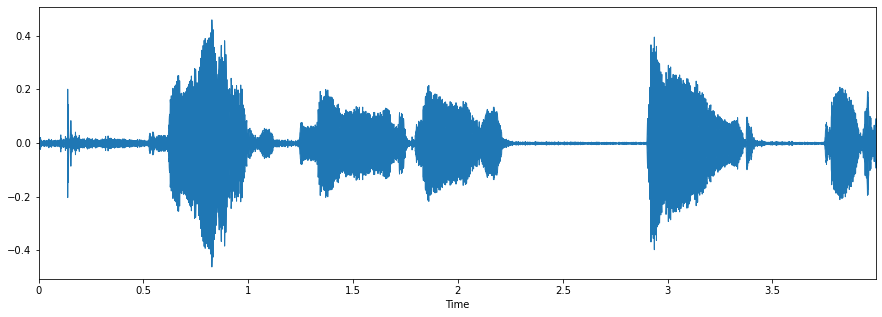

In [3]:
# Import our recording ("output10.wav") and plot the waveform

import librosa
from librosa.display import waveplot
import matplotlib.pyplot as plt

data, sampling_rate = librosa.load('output10.wav')


import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
waveplot(data, sr=sampling_rate)

In [4]:
# Extract audio features (MFCCs) into a Numpy array
import numpy as np

#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [5]:
# Transfer data from Numpy array to Pandas dataframe
livedf2= pd.DataFrame(data=livedf2)
livedf2

,0
0,-24.298567
1,-19.299400
2,-12.611741
3,-10.137557
4,-10.440035
...,...
211,-11.935423
212,-10.263917
213,-10.884883
214,-9.224282


In [6]:
# Transpose dataframe so that rows become columns and columns become rows
livedf2 = livedf2.stack().to_frame().T

In [7]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-24.298567,-19.2994,-12.611741,-10.137557,-10.440035,-13.161448,-11.594347,-11.683915,-12.223632,-12.397475,...,-19.757799,-14.414755,-11.339869,-10.880727,-11.687763,-11.935423,-10.263917,-10.884883,-9.224282,-5.913467


In [8]:
# Take data into Numpy array and add another dimension
twodim= np.expand_dims(livedf2, axis=2)
twodim

array([[[-24.298567 ],
        [-19.2994   ],
        [-12.611741 ],
        [-10.137557 ],
        [-10.440035 ],
        [-13.1614485],
        [-11.594347 ],
        [-11.683915 ],
        [-12.223632 ],
        [-12.397475 ],
        [-10.896104 ],
        [ -9.463198 ],
        [ -9.901805 ],
        [-12.348276 ],
        [-13.871352 ],
        [-14.6793585],
        [-16.055202 ],
        [-14.720993 ],
        [-13.168279 ],
        [-11.834578 ],
        [-12.800783 ],
        [-12.724875 ],
        [-11.44109  ],
        [ -9.932723 ],
        [ -9.713799 ],
        [ -9.401021 ],
        [-10.131358 ],
        [-10.682456 ],
        [-10.492925 ],
        [ -9.071669 ],
        [ -9.98678  ],
        [-10.463278 ],
        [-11.654593 ],
        [ -9.516545 ],
        [ -8.844969 ],
        [ -9.668884 ],
        [-12.065594 ],
        [-12.843327 ],
        [-13.333373 ],
        [-13.043039 ],
        [-13.866942 ],
        [-15.955702 ],
        [-18.154297 ],
        [-1

## Load in Pretrained H5 Model 

In [9]:
# Load in the pretrained H5 model called "Emotion_Voice_Detection_Model", the one we downloaded from "https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer"
import tensorflow as tf
path="/Users/lilipiesanen/SureStart_FutureMakers_Program_and_Projects/Speech-Emotion-Analyzer/Emotion_Voice_Detection_Model.h5"
tf.keras.models.load_model(path)

In [11]:
loaded_model = tf.keras.models.load_model('Emotion_Voice_Detection_Model.h5')

In [12]:
# Let the H5 model make the prediction on our audio features (MFCCs)
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 190ms/step


In [13]:
# Print out the percentage values of the output layer (Softmax output)
livepreds

array([[1.5931760e-14, 2.1001203e-27, 4.6246374e-17, 4.9002724e-15,
        2.4219779e-19, 1.3102969e-05, 1.0001767e-13, 9.9995828e-01,
        1.2900810e-05, 1.5766356e-05]], dtype=float32)

In [14]:
# Print out the label predicted by our H5 model
livepreds1=livepreds.argmax(axis=1)
print(livepreds1)

[7]


In [15]:
# Make sure the label is in integer format
liveabc = livepreds1.astype(int).flatten()
print(liveabc)

[7]


In [16]:
# Define the encoding of the ten string labels into their respective integer labels (0-9), according to the order of the original H5 project ("https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer")
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
str_labels = np.array(["female_angry", "female_calm", "female_fearful", "female_happy", "female_sad", "male_angry", "male_calm", "male_fearful", "male_happy", "male_sad"])
int_labels = lb.fit_transform(str_labels)
print(int_labels)

[0 1 2 3 4 5 6 7 8 9]


In [17]:
# Convert integer label to string label
livepredictions = (lb.inverse_transform((liveabc)))
print(livepredictions)

['male_fearful']
